# One-dimensional Ising model with spin-$\frac{1}{2}$ particles

The Hamiltonian for a system of $ N $ spin-$\frac{1}{2}$ particles on a one-dimensional lattice is given by:

$$
\hat{H} = \lambda \sum_{i=1}^{N} \sigma_z^{(i)} + \sum_{i=1}^{N-1} \sigma_x^{(i)} \sigma_x^{(i+1)}
$$

where $ \sigma_x $ and $ \sigma_z $ are the Pauli matrices and $ \lambda $ is the interaction strength.

1. Write a program to compute the $ N \times N $ matrix representation of the Hamiltonian $ \hat{H} $ for different $ N $.

2. Diagonalize $ \hat{H} $ for different $ N = 1, \ldots, N_{\text{max}} $ and $ \lambda \in [0, -3] $. What is the largest $ N_{\text{max}} $ you can reach?.

3. Plot the first $ k $ levels as a function of $ \lambda $ for different $ N $ and comment on the spectrum.

**Import zone**

In [1]:
import ising_model as im
import phase_transition_functions as ptf

import numpy as np
import matplotlib.pyplot as plt

**Energy gaps analysis**

In [4]:
N_vals = np.arange(4, 15, 1)
l_vals = np.linspace(-0.3, 2, 50)
k = 3

eigenvalues, _ = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


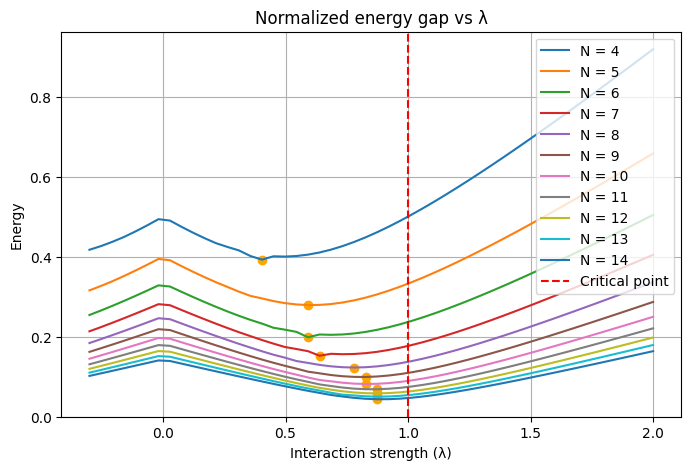

In [5]:
gaps, ls = ptf.plot_energy_gaps(N_vals, l_vals, eigenvalues, no_deg=True)

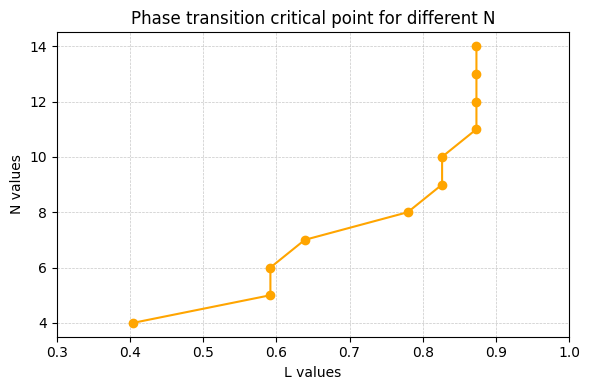

In [21]:
plt.figure(figsize=(6, 4))

plt.plot(ls, N_vals, marker='o', linestyle='-', color='orange')

plt.xlim(0.3, 1)
plt.xlabel('L values')
plt.ylabel('N values')
plt.title('Phase transition critical point for different N')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

**Magnetization**

In [7]:
N_vals = np.arange(2, 15, 1)
l_vals = np.logspace(-2, 2, 20)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=2 ...
Diagonalizing Ising Hamiltonian with N=3 ...
Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


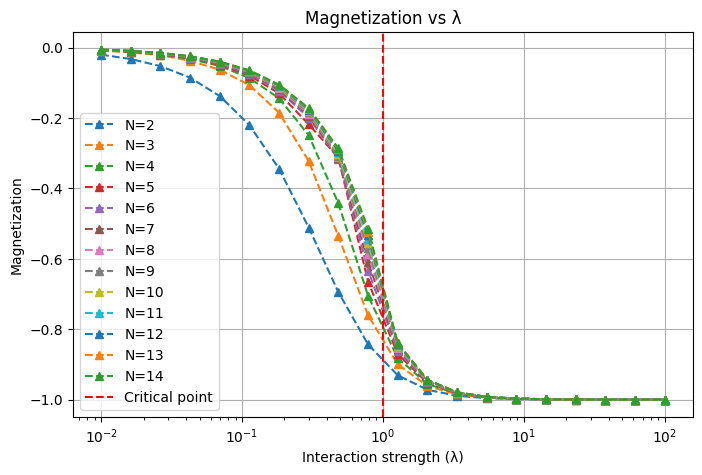

In [9]:
ptf.plot_magnetization(N_vals, l_vals, eigenvectors)

In [22]:
N_vals = np.arange(2, 15, 1)
l_vals = np.logspace(-0.5, 0.5, 20)
k = 2

_, eigenvectors = im.diagonalize_ising(N_vals, l_vals, k)

Diagonalizing Ising Hamiltonian with N=2 ...
Diagonalizing Ising Hamiltonian with N=3 ...
Diagonalizing Ising Hamiltonian with N=4 ...
Diagonalizing Ising Hamiltonian with N=5 ...
Diagonalizing Ising Hamiltonian with N=6 ...
Diagonalizing Ising Hamiltonian with N=7 ...
Diagonalizing Ising Hamiltonian with N=8 ...
Diagonalizing Ising Hamiltonian with N=9 ...
Diagonalizing Ising Hamiltonian with N=10 ...
Diagonalizing Ising Hamiltonian with N=11 ...
Diagonalizing Ising Hamiltonian with N=12 ...
Diagonalizing Ising Hamiltonian with N=13 ...
Diagonalizing Ising Hamiltonian with N=14 ...


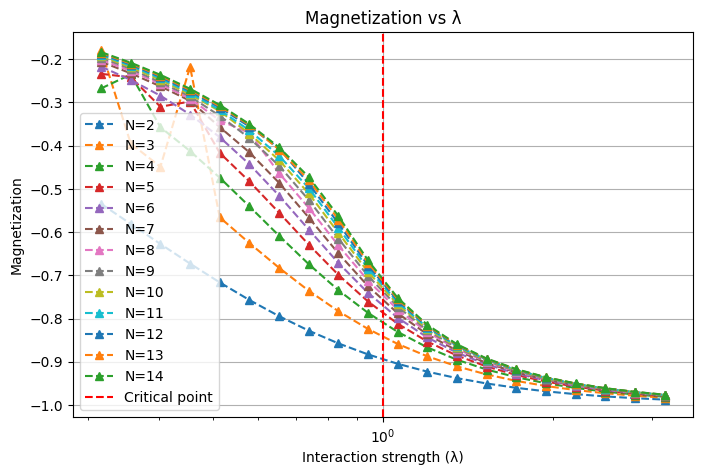

In [23]:
ptf.plot_magnetization(N_vals, l_vals, eigenvectors)

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pt_magnetization(N_values, l_values, eigenvectors):
  infl_points = []  # To store inflection points for each N

  for N in N_values:    
    Ms = []
    # Compute magnetizations for all `l` values
    for l in l_values:
      M = ptf.magnetization(eigenvectors[(N, l)][0], N)  # Assuming ptf.magnetization is defined
      Ms.append(M)
    
    # Compute second derivative
    second_derivative = np.gradient(np.gradient(Ms))
    
    # Find inflection points (where the sign of the second derivative changes)
    sign_changes = np.diff(np.sign(second_derivative))
    infl_points_index = np.where(sign_changes != 0)[0]
    
    # Store the first inflection point index for this N (or process as needed)
    if len(infl_points_index) > 0:
      infl_points.append(l_values[infl_points_index[0]])
    else:
      infl_points.append(None)  # No inflection point found for this N
  
  # Plot the inflection points as a function of N
  plt.figure(figsize=(6, 4))
  plt.plot(infl_points, N_values, marker='o', linestyle='-', color='orange')
  plt.xlabel('N')
  plt.ylabel('Flex Point (l)')
  plt.title('Flex Points vs. N')
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
  plt.tight_layout()
  plt.show()


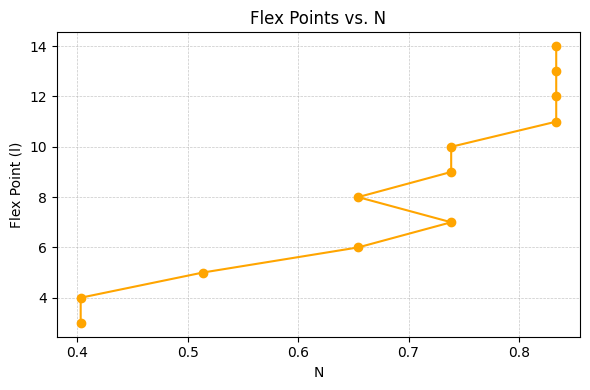

In [35]:
plot_pt_magnetization(N_vals, l_vals, eigenvectors)